<a href="https://colab.research.google.com/github/nupatige/Templates_Machine-learning/blob/main/08_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Human Activity Recognition 
HAR - has emerged as a key research area in the last years and is gaining increasing attention by the pervasive computing research community, especially for the development of context-aware systems. There are many potential applications for HAR, like: elderly monitoring, life log systems for monitoring energy expenditure and for supporting weight-loss programs, and digital assistants for weight lifting exercises.

Read more: http://groupware.les.inf.puc-rio.br/har#sbia_paper_section#ixzz6UErkPbbb

## Import the libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

## Read the data

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/Datasets/Templates/har_train.csv")
test_data =  pd.read_csv("/content/drive/MyDrive/Datasets/Templates/har_validate.csv")

Data is already available as train test split. So train test split not required

## Data information

In [ ]:
print("Training data size : {}".format(train_data.shape))
print("Testing data size : {}".format(test_data.shape))

Training data size : (13737, 53)
Testing data size : (5885, 53)


In [ ]:
train_data.head()

,classe,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,magnet_belt_x,magnet_belt_y,magnet_belt_z,roll_arm,pitch_arm,yaw_arm,total_accel_arm,gyros_arm_x,gyros_arm_y,gyros_arm_z,accel_arm_x,accel_arm_y,accel_arm_z,magnet_arm_x,magnet_arm_y,magnet_arm_z,roll_dumbbell,pitch_dumbbell,yaw_dumbbell,total_accel_dumbbell,gyros_dumbbell_x,gyros_dumbbell_y,gyros_dumbbell_z,accel_dumbbell_x,accel_dumbbell_y,accel_dumbbell_z,magnet_dumbbell_x,magnet_dumbbell_y,magnet_dumbbell_z,roll_forearm,pitch_forearm,yaw_forearm,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
0,A,1.41,8.07,-94.4,3,0.00,0.0,-0.02,-21,4,22,-3,599,-313,-128.0,22.5,-161.0,34,0.00,0.00,-0.02,-288,109,-123,-368,337,516,13.052175,-70.494004,-84.873939,37,0.0,-0.02,0.00,-234,47,-271,-559,293,-65,28.4,-63.9,-153.0,36,0.03,0.00,-0.02,192,203,-215,-17,654,476
1,A,1.41,8.07,-94.4,3,0.02,0.0,-0.02,-22,4,22,-7,608,-311,-128.0,22.5,-161.0,34,0.02,-0.02,-0.02,-290,110,-125,-369,337,513,13.130740,-70.637505,-84.710647,37,0.0,-0.02,0.00,-233,47,-269,-555,296,-64,28.3,-63.9,-153.0,36,0.02,0.00,-0.02,192,203,-216,-18,661,473
2,A,1.42,8.07,-94.4,3,0.00,0.0,-0.02,-20,5,23,-2,600,-305,-128.0,22.5,-161.0,34,0.02,-0.02,-0.02,-289,110,-126,-368,344,513,12.850750,-70.278120,-85.140781,37,0.0,-0.02,0.00,-232,46,-270,-561,298,-63,28.3,-63.9,-152.0,36,0.03,-0.02,0.00,196,204,-213,-18,658,469
3,A,1.48,8.05,-94.4,3,0.02,0.0,-0.03,-22,3,21,-6,604,-310,-128.0,22.1,-161.0,34,0.02,-0.03,0.02,-289,111,-123,-372,344,512,13.431200,-70.393795,-84.873626,37,0.0,-0.02,-0.02,-232,48,-269,-552,303,-60,28.1,-63.9,-152.0,36,0.02,-0.02,0.00,189,206,-214,-16,658,469
4,A,1.45,8.06,-94.4,3,0.02,0.0,-0.02,-21,4,21,0,603,-312,-128.0,22.0,-161.0,34,0.02,-0.03,0.00,-289,111,-122,-369,342,513,13.382459,-70.817588,-84.465003,37,0.0,-0.02,0.00,-234,48,-269,-558,294,-66,27.9,-63.9,-152.0,36,0.02,-0.02,-0.03,193,203,-215,-9,660,478


In [ ]:
test_data.head()

,classe,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,magnet_belt_x,magnet_belt_y,magnet_belt_z,roll_arm,pitch_arm,yaw_arm,total_accel_arm,gyros_arm_x,gyros_arm_y,gyros_arm_z,accel_arm_x,accel_arm_y,accel_arm_z,magnet_arm_x,magnet_arm_y,magnet_arm_z,roll_dumbbell,pitch_dumbbell,yaw_dumbbell,total_accel_dumbbell,gyros_dumbbell_x,gyros_dumbbell_y,gyros_dumbbell_z,accel_dumbbell_x,accel_dumbbell_y,accel_dumbbell_z,magnet_dumbbell_x,magnet_dumbbell_y,magnet_dumbbell_z,roll_forearm,pitch_forearm,yaw_forearm,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
0,A,1.48,8.07,-94.4,3,0.02,0.02,-0.02,-21,2,24,-6,600,-302,-128.0,22.1,-161.0,34,0.00,-0.03,0.00,-289,111,-123,-374,337,506,13.378716,-70.428560,-84.853057,37,0.00,-0.02,0.00,-233,48,-270,-554,292,-68.0,28.0,-63.9,-152.0,36,0.02,0.00,-0.02,189,206,-214,-17,655.0,473.0
1,A,1.45,8.17,-94.4,3,0.03,0.00,0.00,-21,4,22,-3,609,-308,-128.0,21.6,-161.0,34,0.02,-0.03,-0.02,-288,110,-124,-376,334,516,13.330337,-70.850588,-84.446020,37,0.00,-0.02,0.00,-235,48,-270,-558,291,-69.0,27.7,-63.8,-152.0,36,0.02,0.00,-0.02,190,205,-215,-22,656.0,473.0
2,A,1.42,8.21,-94.4,3,0.02,0.00,-0.02,-22,4,21,-8,598,-310,-128.0,21.4,-161.0,34,0.02,0.00,-0.03,-288,111,-124,-371,331,523,13.410478,-70.995942,-84.280049,37,0.02,-0.02,-0.02,-234,48,-268,-554,295,-68.0,27.2,-63.9,-151.0,36,0.00,-0.02,-0.03,193,202,-214,-14,659.0,478.0
3,A,1.48,8.15,-94.4,3,0.00,0.00,0.00,-21,4,23,0,592,-305,-129.0,21.3,-161.0,34,0.02,0.00,-0.03,-289,109,-121,-367,340,509,13.350689,-70.251764,-85.036386,37,0.00,-0.02,0.00,-233,48,-271,-554,297,-73.0,27.1,-64.0,-151.0,36,0.02,0.00,0.00,194,204,-215,-13,656.0,471.0
4,A,1.51,8.12,-94.4,3,0.00,0.00,-0.02,-21,4,22,-6,598,-317,-129.0,21.3,-161.0,34,0.02,0.00,-0.02,-289,110,-122,-371,337,512,13.048351,-70.106391,-85.260577,37,0.00,-0.02,0.00,-233,47,-272,-551,296,-56.0,27.1,-64.0,-151.0,36,0.02,-0.02,0.00,192,204,-213,-13,653.0,481.0


In [ ]:
train_data.columns

Index(['classe', 'roll_belt', 'pitch_belt', 'yaw_belt', 'total_accel_belt',
       'gyros_belt_x', 'gyros_belt_y', 'gyros_belt_z', 'accel_belt_x',
       'accel_belt_y', 'accel_belt_z', 'magnet_belt_x', 'magnet_belt_y',
       'magnet_belt_z', 'roll_arm', 'pitch_arm', 'yaw_arm', 'total_accel_arm',
       'gyros_arm_x', 'gyros_arm_y', 'gyros_arm_z', 'accel_arm_x',
       'accel_arm_y', 'accel_arm_z', 'magnet_arm_x', 'magnet_arm_y',
       'magnet_arm_z', 'roll_dumbbell', 'pitch_dumbbell', 'yaw_dumbbell',
       'total_accel_dumbbell', 'gyros_dumbbell_x', 'gyros_dumbbell_y',
       'gyros_dumbbell_z', 'accel_dumbbell_x', 'accel_dumbbell_y',
       'accel_dumbbell_z', 'magnet_dumbbell_x', 'magnet_dumbbell_y',
       'magnet_dumbbell_z', 'roll_forearm', 'pitch_forearm', 'yaw_forearm',
       'total_accel_forearm', 'gyros_forearm_x', 'gyros_forearm_y',
       'gyros_forearm_z', 'accel_forearm_x', 'accel_forearm_y',
       'accel_forearm_z', 'magnet_forearm_x', 'magnet_forearm_y',
       'ma

In [ ]:
train_data.describe()

,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,magnet_belt_x,magnet_belt_y,magnet_belt_z,roll_arm,pitch_arm,yaw_arm,total_accel_arm,gyros_arm_x,gyros_arm_y,gyros_arm_z,accel_arm_x,accel_arm_y,accel_arm_z,magnet_arm_x,magnet_arm_y,magnet_arm_z,roll_dumbbell,pitch_dumbbell,yaw_dumbbell,total_accel_dumbbell,gyros_dumbbell_x,gyros_dumbbell_y,gyros_dumbbell_z,accel_dumbbell_x,accel_dumbbell_y,accel_dumbbell_z,magnet_dumbbell_x,magnet_dumbbell_y,magnet_dumbbell_z,roll_forearm,pitch_forearm,yaw_forearm,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
count,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.00000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000
mean,64.503131,0.191794,-10.941653,11.317973,-0.004831,0.040013,-0.130328,-5.424620,30.152362,-72.748271,55.887821,593.630414,-345.574798,18.008661,-4.351322,-0.625402,25.534396,0.032231,-0.253170,0.272279,-61.267526,32.423018,-71.204557,190.110359,156.774696,307.093325,24.169800,-10.805747,1.285759,13.724904,0.169835,0.048401,-0.144333,-28.685157,52.807382,-38.349567,-329.790129,222.613526,45.893135,33.285366,10.629762,18.653368,34.717551,0.159878,0.06067,0.142131,-61.736915,163.438087,-55.328383,-311.819611,379.741210,391.859212
std,62.768030,22.363296,95.374331,7.744534,0.206729,0.078435,0.241559,29.697752,28.560242,100.410466,64.301358,35.644963,64.977911,72.481992,30.785256,71.477520,10.499861,1.993452,0.851052,0.554765,181.961560,109.761448,134.741728,443.770390,202.010036,326.838847,69.955355,36.895939,82.455672,10.224851,0.388413,0.486185,0.320320,67.119607,80.663037,109.556535,338.366382,326.140787,139.539433,108.001404,28.189443,103.155454,10.089365,0.629520,2.15904,0.601628,180.263200,200.714691,138.501162,346.766862,511.403542,370.396450
min,-28.900000,-54.900000,-180.000000,0.000000,-1.040000,-0.640000,-1.350000,-120.000000,-69.000000,-269.000000,-52.000000,354.000000,-621.000000,-180.000000,-87.900000,-180.000000,1.000000,-6.370000,-3.440000,-2.330000,-404.000000,-318.000000,-630.000000,-580.000000,-392.000000,-597.000000,-153.509721,-137.340077,-150.871154,0.000000,-1.990000,-1.990000,-2.380000,-237.000000,-182.000000,-334.000000,-643.000000,-3600.000000,-262.000000,-180.000000,-72.500000,-180.000000,0.000000,-3.360000,-7.02000,-8.090000,-498.000000,-585.000000,-410.000000,-1280.000000,-892.000000,-973.000000
25%,1.100000,1.670000,-88.300000,3.000000,-0.030000,0.000000,-0.200000,-21.000000,3.000000,-162.000000,9.000000,581.000000,-375.000000,-31.600000,-25.600000,-43.000000,17.000000,-1.350000,-0.790000,-0.070000,-242.000000,-54.000000,-144.000000,-300.000000,-8.000000,128.000000,-18.159137,-40.691397,-77.657691,4.000000,-0.030000,-0.140000,-0.310000,-50.000000,-8.000000,-141.000000,-535.000000,232.000000,-45.000000,-1.140000,0.000000,-68.800000,29.000000,-0.220000,-1.46000,-0.180000,-178.000000,54.000000,-182.000000,-613.000000,-3.000000,187.000000
50%,114.000000,5.260000,-12.700000,17.000000,0.030000,0.020000,-0.100000,-15.000000,35.000000,-152.000000,35.000000,601.000000,-319.000000,0.000000,0.000000,0.000000,27.000000,0.060000,-0.240000,0.250000,-48.000000,13.000000,-47.000000,282.000000,204.000000,445.000000,48.482403,-20.959091,-4.678465,10.000000,0.130000,0.030000,-0.130000,-8.000000,43.000000,-2.000000,-

In [ ]:
test_data.describe()

,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,magnet_belt_x,magnet_belt_y,magnet_belt_z,roll_arm,pitch_arm,yaw_arm,total_accel_arm,gyros_arm_x,gyros_arm_y,gyros_arm_z,accel_arm_x,accel_arm_y,accel_arm_z,magnet_arm_x,magnet_arm_y,magnet_arm_z,roll_dumbbell,pitch_dumbbell,yaw_dumbbell,total_accel_dumbbell,gyros_dumbbell_x,gyros_dumbbell_y,gyros_dumbbell_z,accel_dumbbell_x,accel_dumbbell_y,accel_dumbbell_z,magnet_dumbbell_x,magnet_dumbbell_y,magnet_dumbbell_z,roll_forearm,pitch_forearm,yaw_forearm,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
count,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000
mean,64.183263,0.570192,-11.819918,11.300085,-0.007370,0.038595,-0.131028,-5.991674,30.160748,-72.232625,54.931011,593.785726,-345.261512,17.413575,-5.220236,-0.603227,25.448258,0.067378,-0.266211,0.262946,-57.842141,33.003398,-71.339677,195.487171,156.229907,305.084962,23.075211,-10.717965,2.581449,13.703144,0.140658,0.040585,-0.093172,-28.453526,52.226678,-38.258963,-325.424469,217.117587,46.428479,35.089755,10.883920,20.501419,34.710110,0.153455,0.109031,0.172520,-61.453186,164.164316,-55.206797,-314.341206,380.992333,397.709245
std,62.713506,22.322734,94.776716,7.737757,0.208729,0.077766,0.240786,29.519482,28.621288,100.538973,63.893867,35.767293,65.752095,73.356627,30.433371,71.102309,10.575049,1.993887,0.852183,0.549417,182.232235,110.118006,134.456558,443.361448,201.694556,326.129636,69.876460,37.223354,82.660518,10.254299,2.689974,0.830014,4.146553,67.780187,80.960166,109.271905,342.882275,328.548149,140.960467,108.114887,28.044355,103.364906,9.978388,0.691182,4.601868,3.069053,181.377979,198.774834,138.165097,347.428437,504.646070,366.621586
min,-28.600000,-55.800000,-179.000000,1.000000,-0.980000,-0.450000,-1.460000,-81.000000,-38.000000,-275.000000,-49.000000,359.000000,-623.000000,-180.000000,-88.800000,-180.000000,1.000000,-5.810000,-3.260000,-2.130000,-367.000000,-279.000000,-636.000000,-584.000000,-375.000000,-581.000000,-153.713729,-149.593648,-148.765510,0.000000,-204.000000,-2.100000,-1.950000,-419.000000,-189.000000,-273.000000,-639.000000,-741.000000,-241.000000,-180.000000,-71.600000,-180.000000,0.000000,-22.000000,-6.620000,-6.990000,-496.000000,-632.000000,-446.000000,-1280.000000,-896.000000,-960.000000
25%,1.080000,1.930000,-88.300000,3.000000,-0.030000,0.000000,-0.200000,-21.000000,3.000000,-162.000000,9.000000,581.000000,-375.000000,-31.900000,-26.200000,-43.100000,17.000000,-1.320000,-0.800000,-0.080000,-241.000000,-55.000000,-142.000000,-300.000000,-9.000000,139.000000,-19.604407,-41.127460,-77.601311,4.000000,-0.030000,-0.140000,-0.330000,-51.000000,-9.000000,-142.000000,-536.000000,231.000000,-46.000000,0.000000,0.000000,-68.200000,29.000000,-0.220000,-1.490000,-0.180000,-178.000000,63.000000,-181.000000,-623.000000,17.000000,197.000000
50%,113.000000,5.360000,-14.300000,17.000000,0.030000,0.020000,-0.100000,-15.000000,35.000000,-152.000000,34.000000,601.000000,-320.000000,0.000000,0.000000,0.000000,27.000000,0.100000,-0.260000,0.230000,-36.000000,15.000000,-47.000000,298.000000,197.000000,440.000000,47.433031,-20.953878,0.000000,10.000000,0.140000,0.050000,-0.130000,-9.000000,39.000000,0.000000,-478.000000,310.000000,12.000000,23.700000,9.300000

## Splitting independent & dependent(Target) variables
## Train test split as the data is given seperately

In [ ]:
# Create the X and Y
x_train = train_data.drop('classe', axis=1)
y_train = train_data.loc[:, 'classe']

x_test = test_data.drop('classe', axis=1)
y_test = test_data.loc[:, 'classe']

## Naive Bayes

### Instantiate the model

In [ ]:
naive_bayes = GaussianNB()

### Train the model (Fitting)

In [ ]:
naive_bayes.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### Prediction

In [ ]:
y_pred = naive_bayes.predict(x_test)
y_pred[:150]

array(['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'D', 'D',
       'E', 'E', 'E', 'E', 'D', 'C', 'C', 'C', 'D', 'C', 'D', 'D', 'D',
       'D', 'D', 'E', 'E', 'E', 'E', 'E', 'E', 'D', 'D', 'D', 'D', 'D',
       'D', 'D', 'D', 'D', 'C', 'C', 'C', 'C', 'D', 'D', 'D', 'D', 'D',
       'D', 'D', 'D', 'D', 'D', 'D', 'D'], dtype='<U1')

In [ ]:
# Comparing the predicted y value to actual y_test data.
y_test.values[:150]

array(['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A'], dtype=object)

### Confusion matrix

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred, labels = ["A","B","C","D","E"] )
cnf_matrix

array([[1070,   95,  262,  212,   35],
       [ 127,  685,  145,   76,  106],
       [ 223,  106,  512,  136,   49],
       [ 102,   35,  271,  441,  115],
       [  51,  239,   95,  143,  554]])

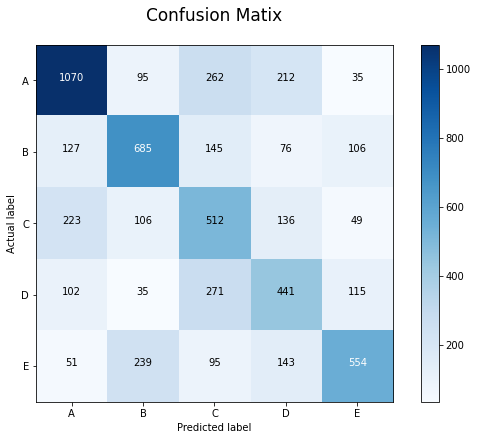

In [ ]:
## Confusion matrix with class labels
## Method - 1

import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model,normalize=False):
    cm = confusion_matrix(y_test,model,labels=["A","B","C","D","E"])
    classes = ["A","B","C","D","E"]
    cmap = plt.cm.Blues
    title = "Confusion Matix"
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        cm = np.around(cm,decimals=3)
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title,y=1.05, fontsize=17)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    
plt.figure(figsize=(8,6))
plot_confusion_matrix(y_pred, normalize=False)
plt.show()

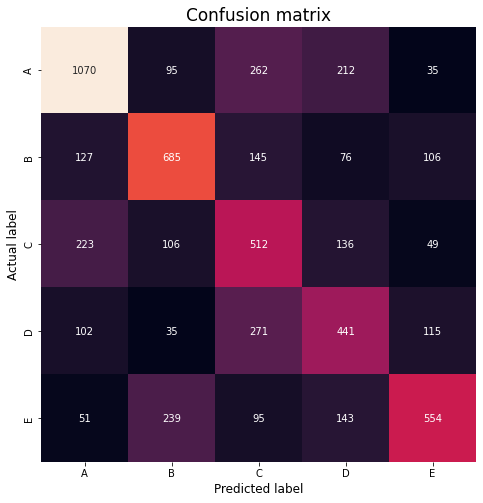

In [ ]:
# Method - 2

plt.figure(figsize=(10,8))
mat = confusion_matrix(y_test,y_pred)
names = np.unique(y_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.title('Confusion matrix', y= 1.05, fontsize=17)
plt.xlabel('Predicted label',fontsize=12)
plt.ylabel('Actual label',fontsize=12)
plt.plot()
plt.show()

### Accuracy, Precision & Recall

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average ='weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred, average = 'weighted'))

Accuracy: 0.5542905692438402
Precision: 0.5674895645892527
Recall: 0.5542905692438402


### Classification report

In [ ]:
print(metrics.classification_report(y_test, y_pred, labels=["A","B","C","D","E"]))

              precision    recall  f1-score   support

           A       0.68      0.64      0.66      1674
           B       0.59      0.60      0.60      1139
           C       0.40      0.50      0.44      1026
           D       0.44      0.46      0.45       964
           E       0.64      0.51      0.57      1082

    accuracy                           0.55      5885
   macro avg       0.55      0.54      0.54      5885
weighted avg       0.57      0.55      0.56      5885

